In [1]:
#!pip install wordcloud

In [2]:
# import des librairies
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd

In [4]:
# lecture du CSV et transformation en dataframe
df = pd.read_csv('csv/tweets.csv')
df

,Datetime,Tweet Id,Text,Username
0,2022-12-31 23:58:04+00:00,1609338127956545536,The Ultimate Art of War A Step by Step Illust...,mosciski52ejffd
1,2022-12-31 23:50:55+00:00,1609336328784576513,truckdriverpleb Unfortunately that is a fact ...,PeterRMacIsaac
2,2022-12-31 23:49:26+00:00,1609335954514366464,lexfridman I read most of those and would rec...,levosaurus
3,2022-12-31 23:48:15+00:00,1609335659277291523,lexfridman The art of war is going to change ...,BullstreetLLC
4,2022-12-31 23:47:13+00:00,1609335398509195268,coupusa EndWokeness The problem with that wh...,GigaChadwick
...,...,...,...,...
3136,2022-12-14 03:35:23+00:00,1602869837004349443,Do you struggle picking out what to read next ...,nemo_nista
3137,2022-12-14 03:11:12+00:00,1602863750653935617,At this weekend I plan to watch Crime Action ...,bingbingliucdc1
3138,2022-12-14 03:06:28+00:00,1602862560570920960,she is ghariba Quran The book thief Tuesdays ...,__dontaskwhy__x
3139,2022-12-14 02:00:54+00:00,1602846057746104324,r4hema six of crows the bell jar the book t...,c13ment1ne


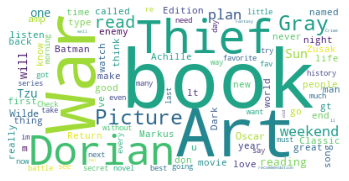

In [7]:
# je fusionne toute la colonne des commentaires Tweet en texte
text = " ".join(i for i in df['Text'])

# tous les mots à exclure pour le nuage de points
exclure_mots = ['t', 'co', 'd', 'du', 'de', 'la', 'des', 'le', 'et', 'est', 'elle', 'une', 'en', 'que', 'aux', 'qui', 'ces', 'les', 'dans', 'sur', 'l', 'un', 'pour', 'par', 'il', 'ou', 'à', 'ce', 'a', 'sont', 'cas', 'plus', 'leur', 'se', 's', 'vous', 'au', 'c', 'aussi', 'toutes', 'autre', 'comme'] + list(STOPWORDS)

# affichage avec matplotlib
wordcloud = WordCloud(collocations = False, background_color = 'white', stopwords = exclure_mots, max_words = 100).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

In [ ]:
# fonction permettant de trouver le nombre d'une chaine de 2 mots consécutifs
def freq2Words(input_string):
    freq = {}
    words = input_string.split()
    if len(words) == 1:
        return freq

    for idx, word in enumerate(words):
        if idx+1 < len(words):
            word_pair = word + " " + words[idx+1]
            if word_pair in freq:
                freq[word_pair] += 1
            else:
                freq[word_pair] = 1
    return freq

# fonction permettant de trouver le nombre d'une chaine de 3 mots consécutifs
def freq3Words(input_string):
    freq = {}
    words = input_string.split()
    if len(words) == 1:
        return freq

    for idx, word in enumerate(words):
        if idx+2 < len(words):
            word_pair = word + " " + words[idx+1] + " " + words[idx+2]
            if word_pair in freq:
                freq[word_pair] += 1
            else:
                freq[word_pair] = 1
    return freq

# fonction permettant de trier le dictionnaire, du + grand au plus petit
def sort_dict_by_value(d, reverse = False):
  return dict(sorted(d.items(), key = lambda x: x[1], reverse = reverse))

# librairie qui récupère les x premières lignes d'un dictionnaire 
from collections import Counter

# -------- à la recherche des féquences ---------
# --- je prend que les 300 premiers résultats ---
frequence2Words = freq2Words(text)
frequence2Words = sort_dict_by_value(frequence2Words, True)
frequence2Words = dict(Counter(frequence2Words).most_common(300))

frequence3Words = freq3Words(text)
frequence3Words = sort_dict_by_value(frequence3Words, True)
frequence3Words = dict(Counter(frequence3Words).most_common(300))
# --------- ---------------------------- --------

# transformation des données récupérées en un seul dataframe
df1 = pd.DataFrame(list(frequence2Words.items())).reset_index()
df1.columns = ['id', '2_words', '2_words_qty']
df2 = pd.DataFrame(list(frequence3Words.items())).reset_index()
df2.columns = ['id', '3_words', '3_words_qty']
# fusion des 2 dataframes
df = pd.merge(df1, df2,  how="inner", on='id')
df